In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [24]:
def return_clusters(n=1000, s=1, probabilities=(0.4,0.4,0.2), means=((0, 0), (3, 3), (0, 4))):
    cov = np.eye(2) + s 
    normals  = [np.random.multivariate_normal(mean, cov=cov, size=(n, )) for mean in means]
    clusters = np.random.choice(np.arange(3), p=probabilities, size=(n,))
    X = np.concatenate([normals[cluster][i].reshape(1, -1) for i, cluster in enumerate(clusters)], axis=0)
    return clusters, X
clusters, X = return_clusters(s=1)

In [64]:
def plot_clusters(X, clusters, pred_clusters=None, axs=None):
    if pred_clusters is None: 
        if axs is None:
            fig, axs = plt.subplots()
        sn.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, ax=axs)
    else: 
        if axs is None:
            fig, axs = plt.subplots(nrows=2, figsize=(6, 12))
        sn.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, ax=axs[0])
        axs[0].set_title('True')
        sn.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred_clusters, ax=axs[1])
        axs[1].set_title('Pred')

In [66]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

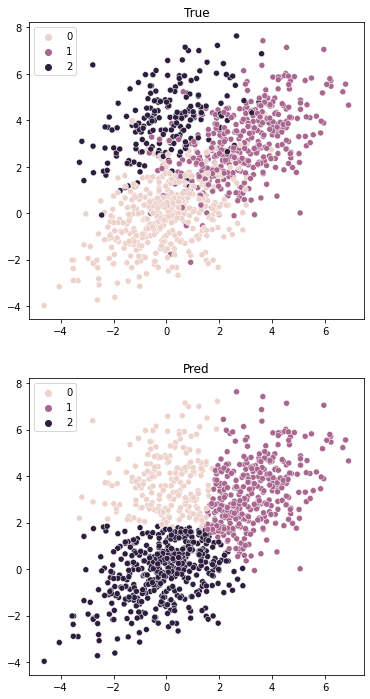

In [67]:
pred_clusters = KMeans(n_clusters=3).fit_predict(X)
plot_clusters(X, clusters, pred_clusters)

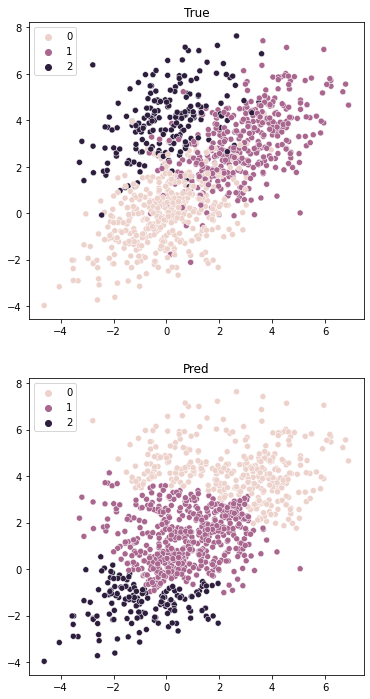

In [68]:
pred_clusters = AgglomerativeClustering(
        n_clusters=3, linkage="ward"
    ).fit_predict(X)
plot_clusters(X, clusters, pred_clusters)

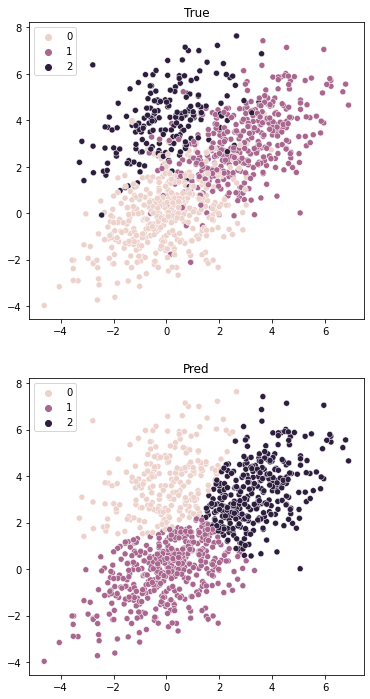

In [69]:
pred_clusters = GaussianMixture(n_components=3, covariance_type='full').fit_predict(X)
plot_clusters(X, clusters, pred_clusters)

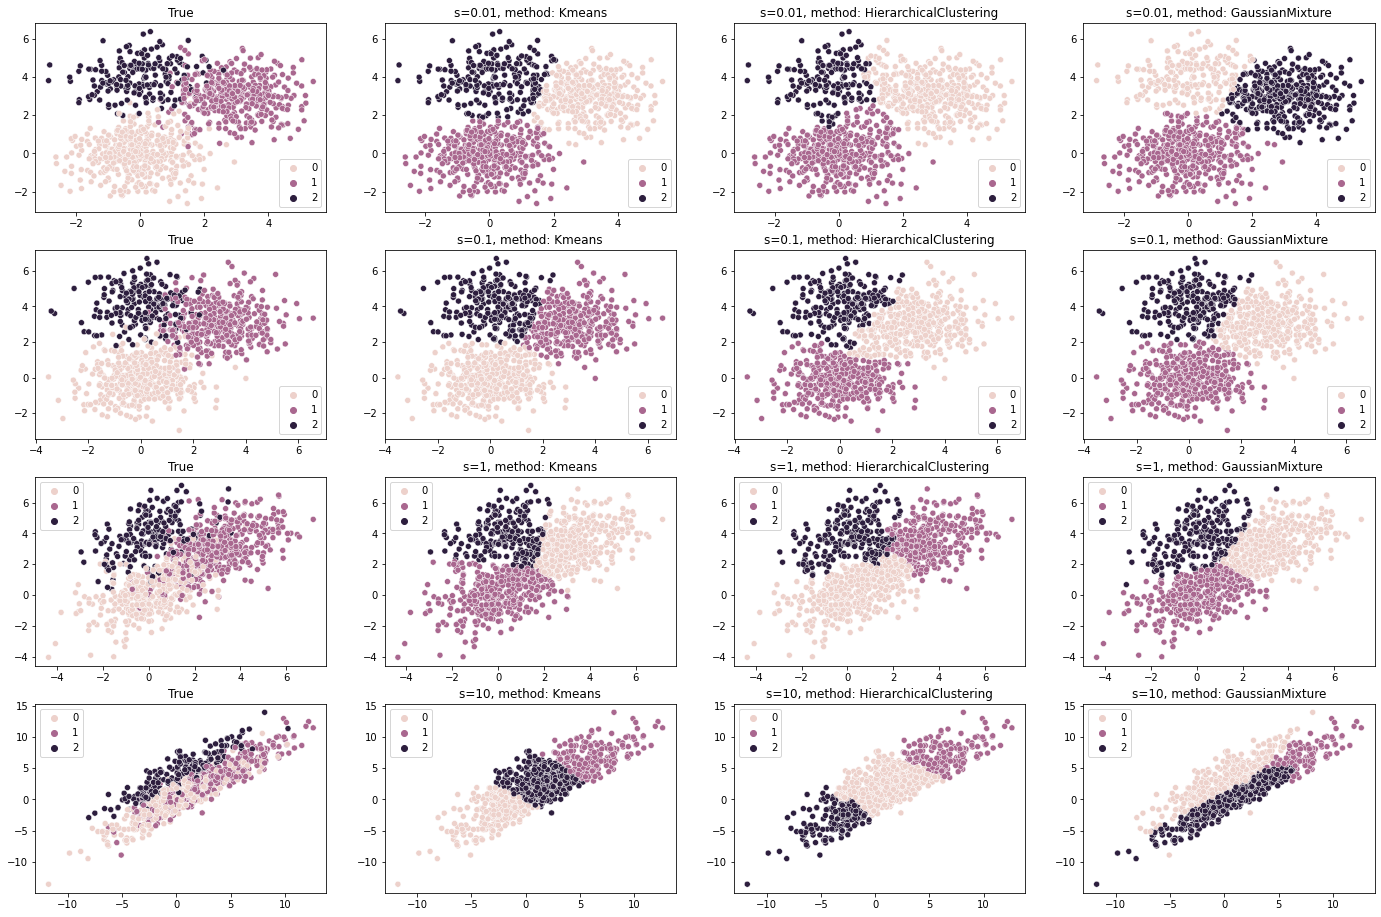

In [75]:
ss = [0.01, 0.1, 1, 10]

methods = {
    'Kmeans': lambda : KMeans(n_clusters=3),
    'HierarchicalClustering': lambda : AgglomerativeClustering(n_clusters=3, linkage="ward"),
    'GaussianMixture': lambda : GaussianMixture(n_components=3, covariance_type='full')}
fig, axs = plt.subplots(nrows=len(ss), ncols=3+1, figsize=(4*6, len(ss)*4))
axs = axs.flatten()
i = 0
for s in ss: 
    clusters, X = return_clusters(s=s)
    plot_clusters(X, clusters, axs=axs[i])
    axs[i].set_title('True')
    i+=1

    for method_name, method in methods.items(): 
        axs[i].set_title(f's={s}, method: {method_name}')
        pred_clusters = method().fit_predict(X)
        plot_clusters(X, pred_clusters, axs=axs[i])
        i+= 1
    